Importing libraries

In [1]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows() # Allows altair to use 5k + datasets
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import dataset and data cleaning

In [2]:
df = pd.read_csv('/Users/jaimesastrecrespo/Desktop/my saved of sunday night/tracks.csv')

In [3]:
df.head(273)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0WBUzUenwyBGqeenzqhEG0,Chapter 1.18 - Król Maciuś Pierwszy,0,136500,0,['Janusz Korczak'],['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.757,0.2700,1,-19.441,1,0.9390,0.795,0.0000,0.132,0.819,103.760,4
269,0Wi1XhlXoxuZHVhulDK4La,Chapter 6.20 & Chapter 7.1 - Król Maciuś Pierwszy,0,134200,0,['Janusz Korczak'],['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.624,0.2500,5,-21.041,0,0.9520,0.767,0.0000,0.361,0.602,81.702,1
270,0Y9Sd7SkWFrmMvxJXagqo8,Chapter 2.12 - Król Maciuś Pierwszy,0,133400,0,['Janusz Korczak'],['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.734,0.2730,5,-16.869,0,0.9550,0.766,0.0000,0.126,0.791,91.951,4
271,0YIo0uq3o867nFkE9I9hf2,Pleadin' for the Blues,4,178707,0,"['Bertha ""Chippie"" Hill', 'Louis Armstrong']","['1sPDyROEgOvKQlReOg874E', '19eLuQmk9aCobbVDHc...",1923,0.661,0.1340,2,-12.610,1,0.0763,0.996,0.0011,0.119,0.575,71.497,4


In [4]:
df.shape

(586672, 20)

In [5]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [6]:
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# New column in seconds, drop miliseconds
df['duration'] = round(df['duration_ms']/1000,0)
df.drop("duration_ms",axis=1, inplace=True)

In [9]:
#As some songs have more than one artist, I want to know how many artists have each song
df['artists_count'] = df['artists'].apply(lambda x: x.count(',') + 1 )

In [10]:
#Remove the Square Brackets from the artists

df["artists"]=df["artists"].str.replace("[", "")
df["artists"]=df["artists"].str.replace("]", "")
df["artists"]=df["artists"].str.replace("'", "")

In [11]:
# I want to know in which year the song released
df['year'] = pd.DatetimeIndex(df['release_date']).year
#And for the decade: 
#                   create a decade column for each track based on the year of its release
df['Song_decade'] = None

df.loc[(df['year'] >= 1920) & (df['year'] < 1930), 'Song_decade'] = '1920s'
df.loc[(df['year'] >= 1930) & (df['year'] < 1940), 'Song_decade'] = '1930s'
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'Song_decade'] = '1940s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'Song_decade'] = '1950s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'Song_decade'] = '1960s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980) , 'Song_decade'] = '1970s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990) , 'Song_decade'] = '1980s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000) , 'Song_decade'] = '1990s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010) , 'Song_decade'] = '2000s'
df.loc[(df['year'] >= 2010) & (df['year'] < 2020) , 'Song_decade'] = '2010s'
df.loc[(df['year'] >= 2020) & (df['year'] < 2030) , 'Song_decade'] = '2020s'

In [12]:
df.head(275)

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count,year,Song_decade
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,...,0.674,0.7440,0.151,0.127,104.851,3,127.0,1,1922,1920s
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,...,0.797,0.0000,0.148,0.655,102.009,1,98.0,1,1922,1920s
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,...,0.994,0.0218,0.212,0.457,130.418,5,182.0,1,1922,1920s
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,...,0.995,0.9180,0.104,0.397,169.980,3,177.0,1,1922,1920s
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,...,0.989,0.1300,0.311,0.196,103.220,4,163.0,1,1922,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0Y9Sd7SkWFrmMvxJXagqo8,Chapter 2.12 - Król Maciuś Pierwszy,0,0,Janusz Korczak,['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.734,0.2730,5,...,0.766,0.0000,0.126,0.791,91.951,4,133.0,1,1923,1920s
271,0YIo0uq3o867nFkE9I9hf2,Pleadin' for the Blues,4,0,"Bertha ""Chippie"" Hill, Louis Armstrong","['1sPDyROEgOvKQlReOg874E', '19eLuQmk9aCobbVDHc...",1923,0.661,0.1340,2,...,0.996,0.0011,0.119,0.575,71.497,4,179.0,2,1923,1920s
272,0YSsZU8Ho1rfH6mhj1plVb,Chapter 2.19 - Król Maciuś na wyspie bezludnej,0,0,Janusz Korczak,['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.699,0.2610,5,...,0.919,0.0000,0.152,0.689,54.428,4,133.0,1,1923,1920s
273,0ZLFySfiageV9HiIi5gta0,Chapter 5.13 - Król Maciuś Pierwszy,0,0,Janusz Korczak,['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.630,0.2620,1,...,0.788,0.0000,0.236,0.787,167.846,5,142.0,1,1923,1920s


In [13]:
df.duplicated().any().sum() 
# no duplicates

0

In [14]:
## lets examine the dataset closely for duplicates
## examine the dataset for tracks with same name and artists, we can see that the dataset has some duplicate rows
## duplicates were not seen earlier because of a unique id column for each row
duplicate_names_artist = df[df.duplicated(['name', 'artists'])] 
# there are songs with same name and artists
duplicate_names_artist

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count,year,Song_decade
121,5cUFFY2Atw4QeFitueQCt2,El Huerfano - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.366,0.0749,7,...,0.99600,0.924000,0.1170,0.515,90.969,3,160.0,1,1922,1920s
230,5eXOIVUkW17FqnEoLR2wTX,Stardust,5,0,Louis Armstrong,['19eLuQmk9aCobbVDHc6eek'],1923,0.614,0.2980,3,...,0.97000,0.646000,0.0514,0.772,122.319,4,214.0,1,1923,1920s
398,2gFUqcLFUDVXcWmeKAOnGd,Pobre Cotorro - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1923-03-29,0.502,0.2980,5,...,0.99500,0.919000,0.2850,0.510,135.238,4,171.0,1,1923,1920s
511,4Q5I6riVFNV4mJaqSCmB0C,Basin Street Blues - rec. 1928,4,0,Louis Armstrong & His Hot Five,['0t4VVR2T9Sb0z3NdDdEU6S'],1923,0.604,0.2790,10,...,0.98600,0.237000,0.2750,0.594,123.271,4,207.0,1,1923,1920s
719,0OJgo5mwk8SirgbF8Ht4lA,Juan de los Santos Arena - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1924-03-29,0.408,0.1980,4,...,0.98000,0.900000,0.1140,0.150,120.807,4,144.0,1,1924,1920s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586602,3fSZR3szZHnFQkpMFzwDNF,我在呢,45,0,TANK 呂建忠,['39LWbzZB6lcrRviPzrAVdZ'],2018-08-02,0.577,0.4470,1,...,0.59200,0.000000,0.1070,0.318,119.905,4,217.0,1,2018,2010s
586604,11DUHbs4Vu8M7ppePmszse,誰,45,0,Yo Lee,['1D2LuIU6rgg0MGa0l8wYJh'],2018-08-31,0.468,0.2600,1,...,0.69400,0.000000,0.1090,0.214,128.579,4,251.0,1,2018,2010s
586637,1HpzOCZbNWzxvvXfSGtSrX,Find U Again (feat. Camila Cabello),64,0,"Mark Ronson, Camila Cabello","['3hv9jJF3adDNsBSIQDqcjp', '4nDoRrQiYLoBzwC5Bh...",2019-05-30,0.605,0.6640,8,...,0.00548,0.000003,0.2040,0.164,103.997,4,176.0,2,2019,2010s
586646,0F2muCxmWhi7NfY9poM0KZ,至少我還記得 - 天堂的微笑插曲,44,0,Eric Chou,['5fEQLwq1BWWQNR8GzhOIvi'],2019-01-10,0.269,0.3680,10,...,0.72400,0.000003,0.1110,0.337,168.803,4,305.0,1,2019,2010s


In [15]:
#We'll drop duplicates based on two columns and keeping the first element
df.drop_duplicates(subset=['name', 'artists'], keep='first', inplace=True)

In [16]:
df.to_csv('tracks_clean_kaggle.csv')

# EDA

In [17]:
df.corr()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count,year
popularity,1.000000,0.218072,0.188015,0.300279,0.016574,0.325545,-0.038195,-0.048010,-0.367835,-0.225770,-0.045251,0.001140,0.068951,0.085689,0.025617,-0.067011,0.597496
explicit,0.218072,1.000000,0.152588,0.124583,0.011638,0.136111,-0.051707,0.097406,-0.150452,-0.068409,-0.013802,-0.017498,0.006504,0.045275,-0.016813,0.057402,0.214077
danceability,0.188015,0.152588,1.000000,0.239546,0.018049,0.247517,-0.044366,0.204539,-0.240132,-0.225291,-0.102563,0.527969,-0.040825,0.143167,-0.120353,-0.075630,0.223482
energy,0.300279,0.124583,0.239546,1.000000,0.036860,0.764564,-0.065930,-0.058809,-0.711486,-0.190010,0.126162,0.374261,0.228422,0.187610,0.027024,-0.123999,0.453658
key,0.016574,0.011638,0.018049,0.036860,1.000000,0.026990,-0.131259,-0.002053,-0.028255,-0.007047,-0.007099,0.018544,0.005294,0.008997,0.005792,-0.006990,0.024193
loudness,0.325545,0.136111,0.247517,0.764564,0.026990,1.000000,-0.041621,-0.176345,-0.515712,-0.322586,0.028992,0.278138,0.189358,0.162997,0.002688,-0.141663,0.441203
mode,-0.038195,-0.051707,-0.044366,-0.065930,-0.131259,-0.041621,1.000000,-0.016855,0.059094,-0.010453,0.008361,0.011441,0.006785,-0.016461,-0.027581,0.000230,-0.083401
speechiness,-0.048010,0.097406,0.204539,-0.058809,-0.002053,-0.176345,-0.016855,1.000000,0.072514,-0.108308,0.214686,0.044785,-0.094675,-0.118813,-0.128515,0.039060,-0.086312
acousticness,-0.367835,-0.150452,-0.240132,-0.711486,-0.028255,-0.515712,0.059094,0.072514,1.000000,0.196621,-0.005281,-0.182170,-0.194486,-0.172061,-0.065743,0.135144,-0.520270
instrumentalness,-0.225770,-0.068409,-0.225291,-0.190010,-0.007047,-0.322586,-0.010453,-0.108308,0.196621,1.000000,-0.043857,-0.175088,-0.051939,-0.039653,0.070450,0.075550,-0.209556


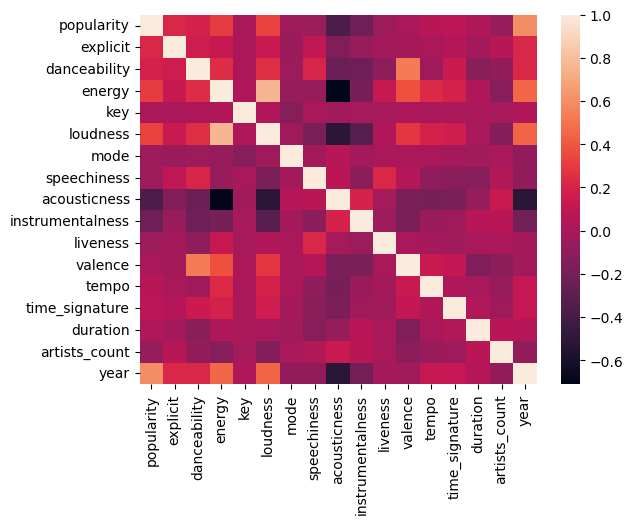

In [18]:
sns.heatmap(df.corr());

In [19]:
# (alt.
#   Chart(df).
#   mark_line().
#   encode(x='year', y='duration').
#   properties(height=300, width=600))

In [20]:
df_year_control = df.copy()
df_year_control = df_year_control[(df_year_control["year"] >= 1920) & (df_year_control["year"] < 2020)]
df_year_control = df_year_control.groupby("Song_decade").mean().reset_index()

df_year_control['acousticness'] = df_year_control['acousticness'] / df_year_control['acousticness'].max()
df_year_control['danceability'] = df_year_control['danceability'] / df_year_control['danceability'].max()
df_year_control['duration'] = df_year_control['duration'] / df_year_control['duration'].max()
df_year_control['energy'] = df_year_control['energy'] / df_year_control['energy'].max()
df_year_control['instrumentalness'] = df_year_control['instrumentalness'] / df_year_control['instrumentalness'].max()
df_year_control['liveness'] = df_year_control['liveness'] / df_year_control['liveness'].max()
df_year_control['speechiness'] = df_year_control['speechiness'] / df_year_control['speechiness'].max()
df_year_control['tempo'] = df_year_control['tempo'] / df_year_control['tempo'].max()
df_year_control['valence'] = df_year_control['valence'] / df_year_control['valence'].max()
df_year_control['popularity'] = df_year_control['popularity'] / df_year_control['popularity'].max()
df_year_control['loudness'] = df_year_control['loudness'] / df_year_control['loudness'].min()   #min because it is a negative value
df_year_control['year'] = df_year_control['year'].astype(str)
df_year_control.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.471816,0.022367,0.897901,0.684965,5.170438,0.792116,0.682686,0.422311,0.667429,0.467375,0.942874,0.920926,0.948764,3.830910,0.912935,1.385277
std,0.369530,0.039253,0.082146,0.234615,0.111961,0.182099,0.041511,0.233625,0.280077,0.303768,0.031226,0.061941,0.039247,0.066217,0.078273,0.228799
min,0.024861,0.000789,0.779824,0.416601,5.005198,0.492514,0.599638,0.245655,0.320789,0.156536,0.896075,0.821159,0.881638,3.748476,0.741020,1.160573
25%,0.090826,0.001026,0.827174,0.458723,5.098541,0.713785,0.665257,0.297733,0.416915,0.218739,0.930222,0.875418,0.926671,3.775047,0.871901,1.203361
50%,0.533321,0.002629,0.914841,0.689309,5.156149,0.807217,0.698056,0.331439,0.650708,0.344790,0.937870,0.942361,0.948332,3.821216,0.924839,1.334890
75%,0.721444,0.026144,0.960122,0.864336,5.241749,0.945569,0.707936,0.430402,0.945444,0.702231,0.952096,0.961596,0.978735,3.878636,0.960405,1.481134
max,1.000000,0.123994,1.000000,1.000000,5.338898,1.000000,0.733888,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.929211,1.000000,1.828150


In [21]:
df_year_control.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration,artists_count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.471816,0.022367,0.897901,0.684965,5.170438,0.792116,0.682686,0.422311,0.667429,0.467375,0.942874,0.920926,0.948764,3.830910,0.912935,1.385277
std,0.369530,0.039253,0.082146,0.234615,0.111961,0.182099,0.041511,0.233625,0.280077,0.303768,0.031226,0.061941,0.039247,0.066217,0.078273,0.228799
min,0.024861,0.000789,0.779824,0.416601,5.005198,0.492514,0.599638,0.245655,0.320789,0.156536,0.896075,0.821159,0.881638,3.748476,0.741020,1.160573
25%,0.090826,0.001026,0.827174,0.458723,5.098541,0.713785,0.665257,0.297733,0.416915,0.218739,0.930222,0.875418,0.926671,3.775047,0.871901,1.203361
50%,0.533321,0.002629,0.914841,0.689309,5.156149,0.807217,0.698056,0.331439,0.650708,0.344790,0.937870,0.942361,0.948332,3.821216,0.924839,1.334890
75%,0.721444,0.026144,0.960122,0.864336,5.241749,0.945569,0.707936,0.430402,0.945444,0.702231,0.952096,0.961596,0.978735,3.878636,0.960405,1.481134
max,1.000000,0.123994,1.000000,1.000000,5.338898,1.000000,0.733888,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.929211,1.000000,1.828150


In [22]:
df_year_control.drop(["key","mode","year","artists_count","time_signature"],axis=1,inplace=True)
df_year_control = df_year_control.melt("Song_decade")

In [23]:
x =df.groupby("year")["acousticness","danceability","energy","valence"].mean().reset_index()
x = x[(x["year"] >= 1920) & (x["year"] <= 2020)]
x = pd.melt(x,id_vars=["year"])

alt.Chart(x).mark_line().encode(
    x='year',
    y='value',
    color='variable',
    strokeDash='variable',
).properties(width = 600)

alt.Chart(...)

In [24]:
decade = df[(df["year"] < 2020) & (df["year"] >= 1920)].groupby("Song_decade")["name"].count().reset_index()
alt.Chart(decade).mark_bar().encode(
    x = "Song_decade:O",
    
    y = alt.Y("name:Q",title="Number of songs"),
    color = alt.value("steelblue")
).properties(width = 600)

alt.Chart(...)

In [31]:
fig = px.line_polar(df_year_control, r="value",theta="variable",line_close=True,
             animation_frame="Song_decade",template="plotly_dark",range_r = (0,1))
fig.update_traces(fill='toself')
fig.update_layout(font_size=15)
fig.show()

In [43]:
df_year_control

,Song_decade,variable,value
0,1920s,popularity,0.029146
1,1930s,popularity,0.053862
2,1940s,popularity,0.045517
3,1950s,popularity,0.214237
4,1960s,popularity,0.456988
...,...,...,...
115,1970s,duration,0.962034
116,1980s,duration,0.943545
117,1990s,duration,0.998987
118,2000s,duration,1.000000
